Context and Content

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id : Unique ID for candidate
city: City code
city_ development _index : Developement index of the city (scaled)
gender: Gender of candidate
relevent_experience: Relevant experience of candidate
enrolled_university: Type of University course enrolled if any
education_level: Education level of candidate
major_discipline :Education major discipline of candidate
experience: Candidate total experience in years
company_size: No of employees in current employer's company
company_type : Type of current employer
lastnewjob: Difference in years between previous job and current job
training_hours: training hours completed
target: 0 – Not looking for job change, 1 – Looking for a job change
Inspiration

Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

In [1]:
import pandas as pd

data = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_train.csv')

In [2]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.shape

(19158, 14)

# EDA_Visual

--------------------------------------------------
col :  enrollee_id


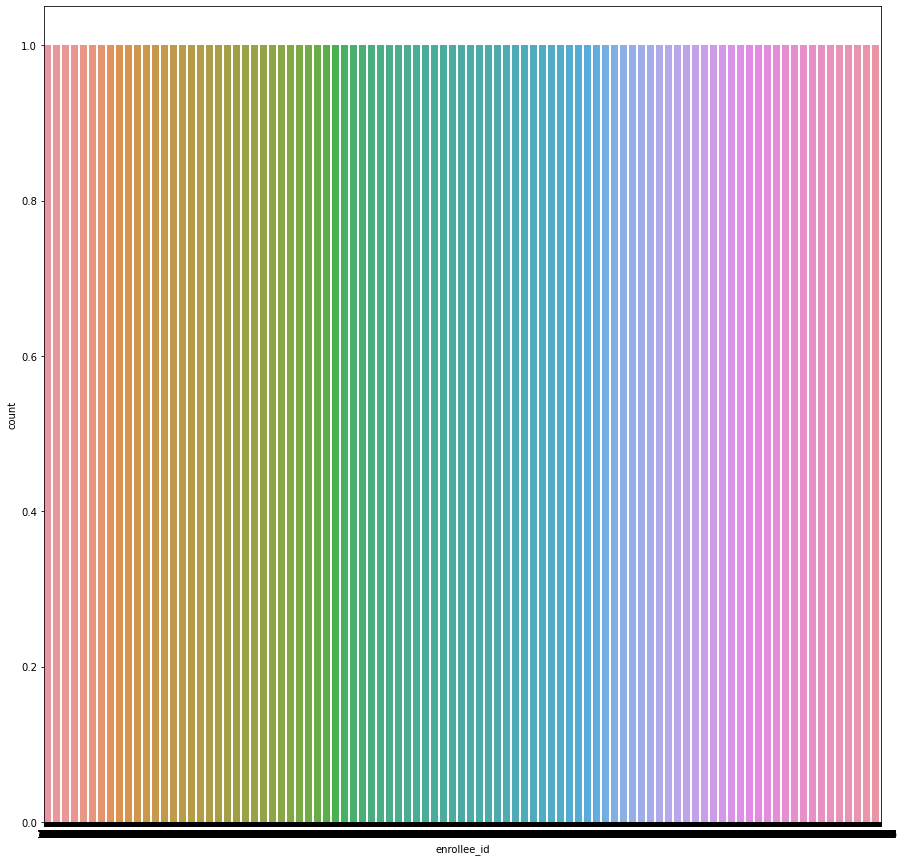

--------------------------------------------------
col :  city


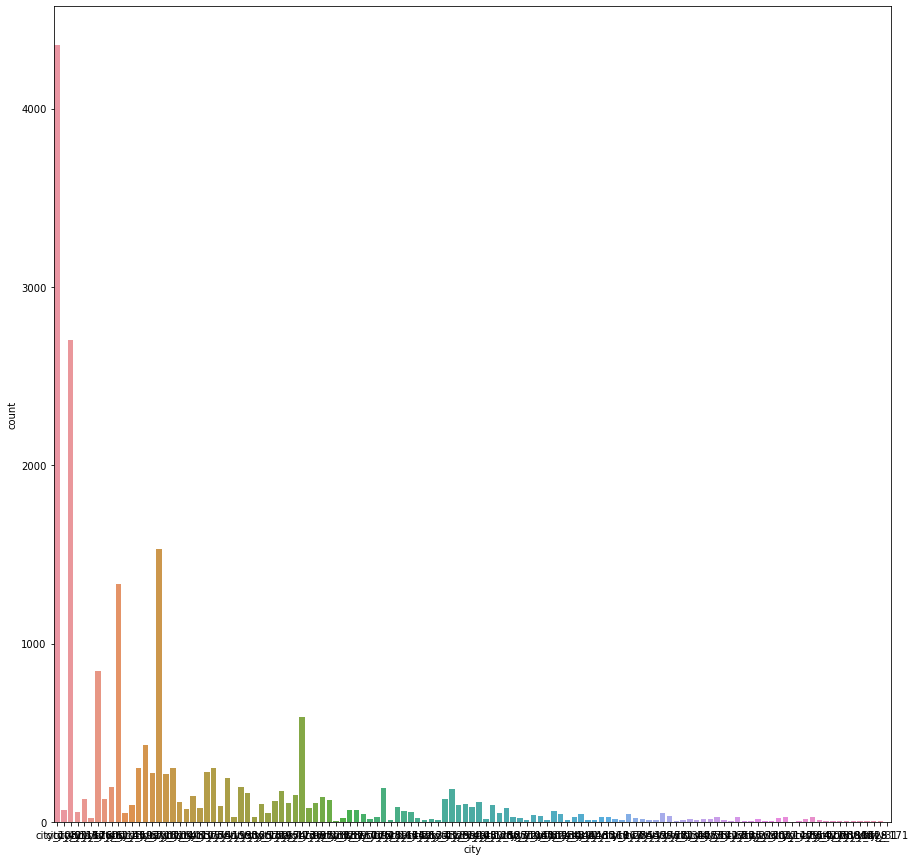

--------------------------------------------------
col :  city_development_index


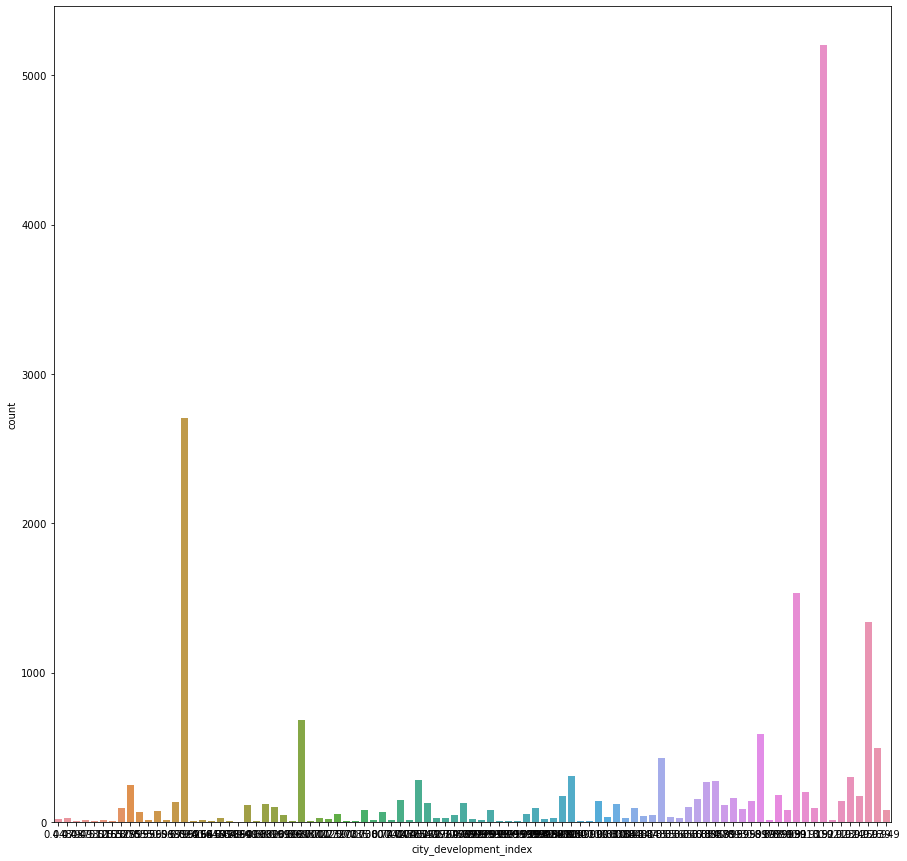

--------------------------------------------------
col :  gender


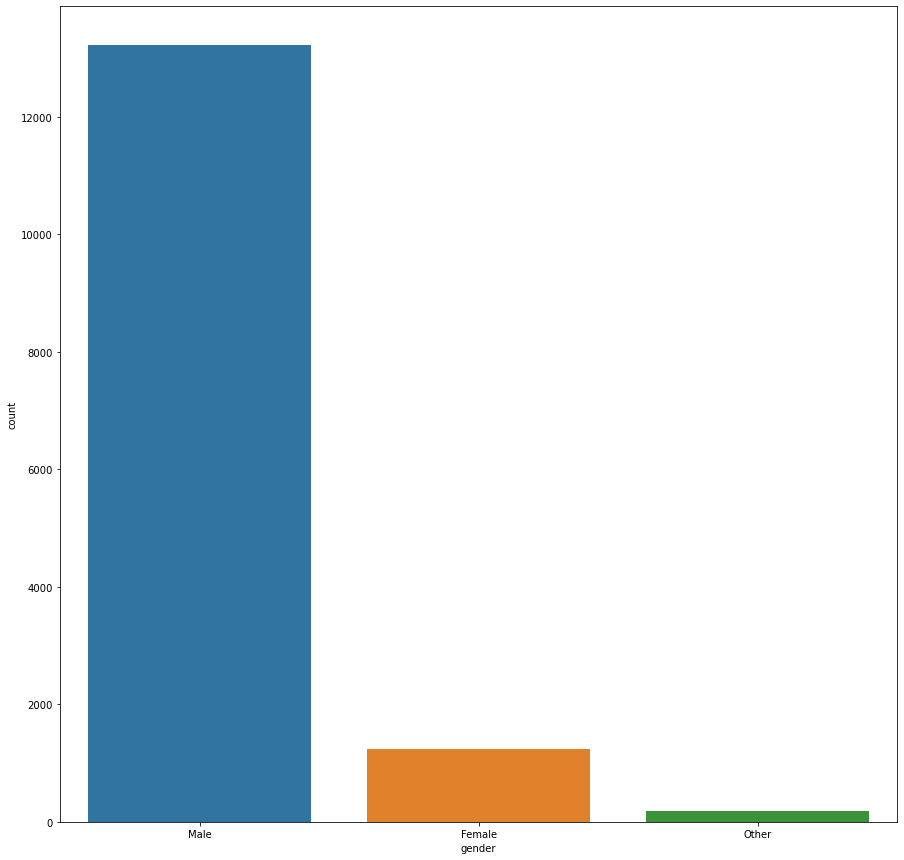

--------------------------------------------------
col :  relevent_experience


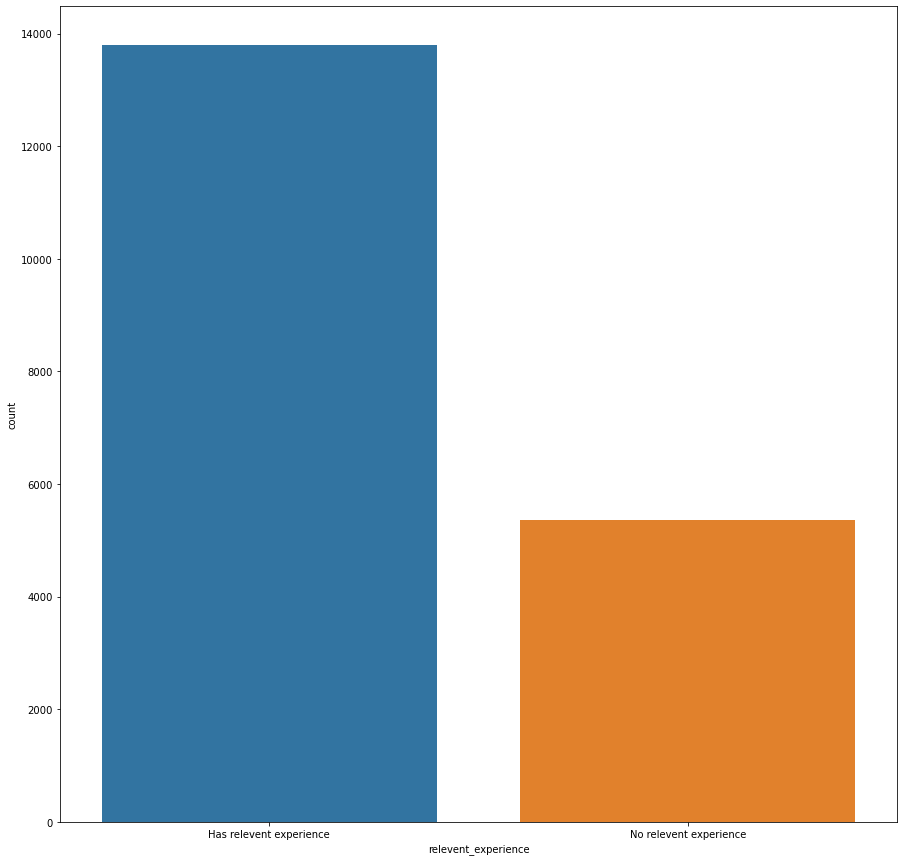

--------------------------------------------------
col :  enrolled_university


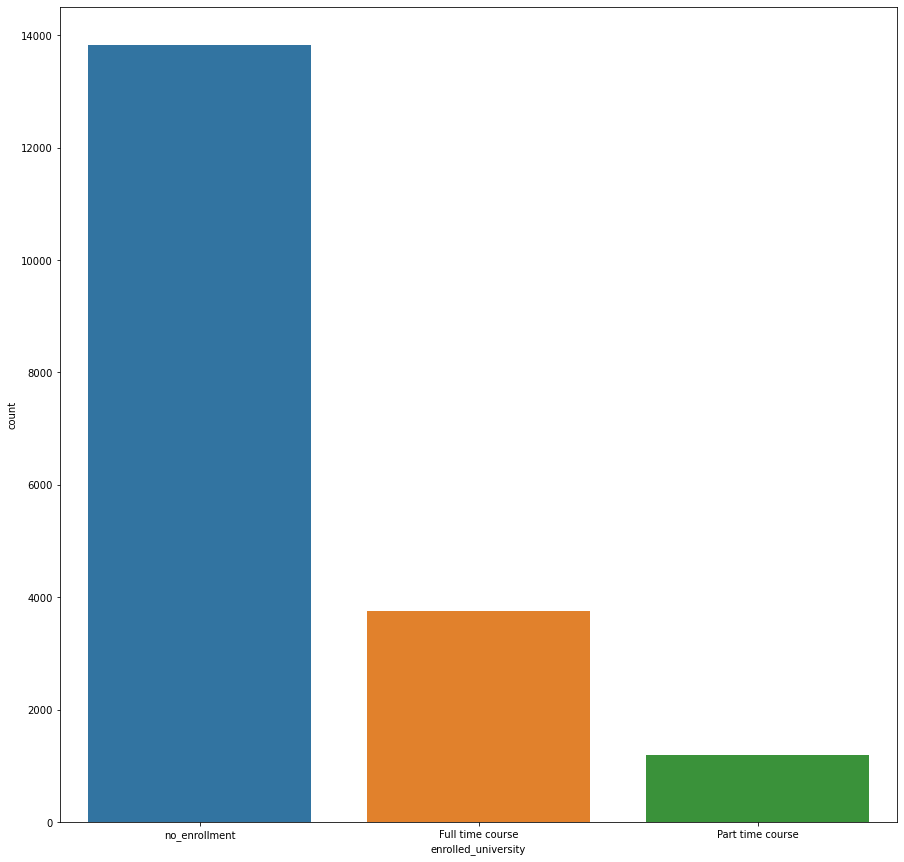

--------------------------------------------------
col :  education_level


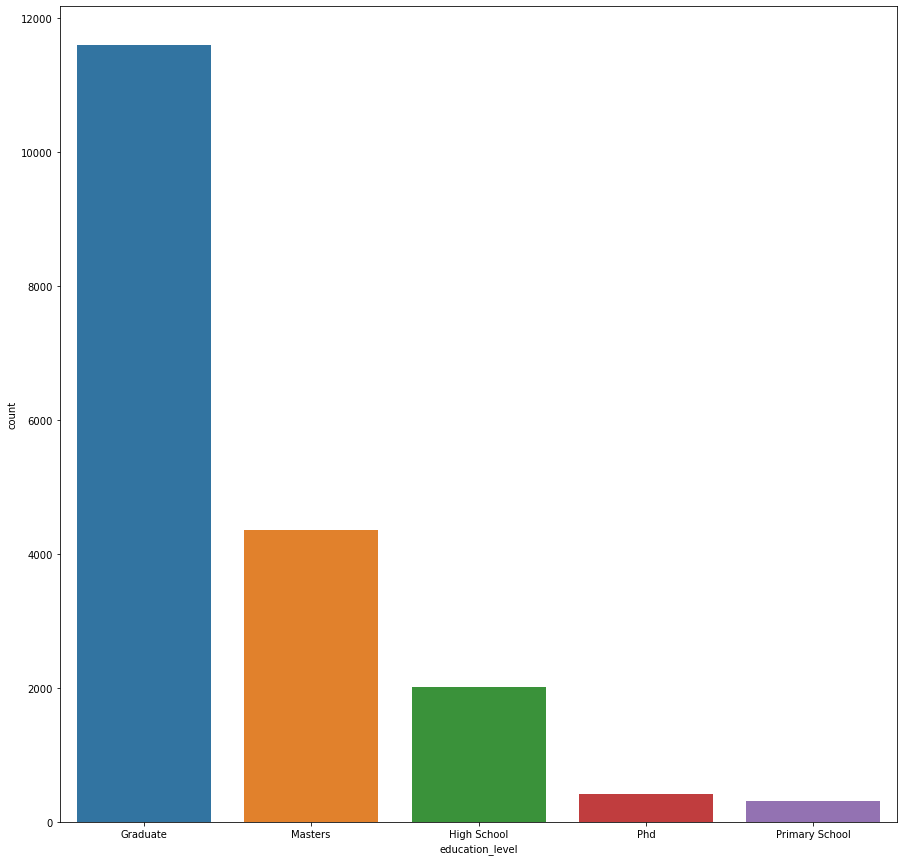

--------------------------------------------------
col :  major_discipline


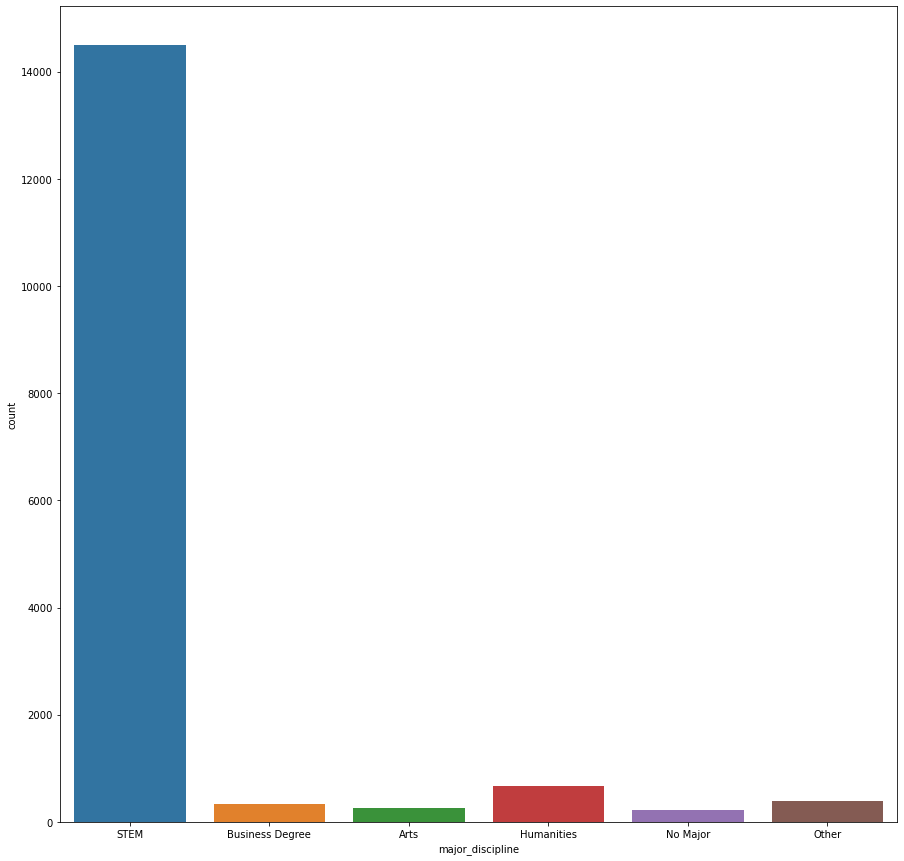

--------------------------------------------------
col :  experience


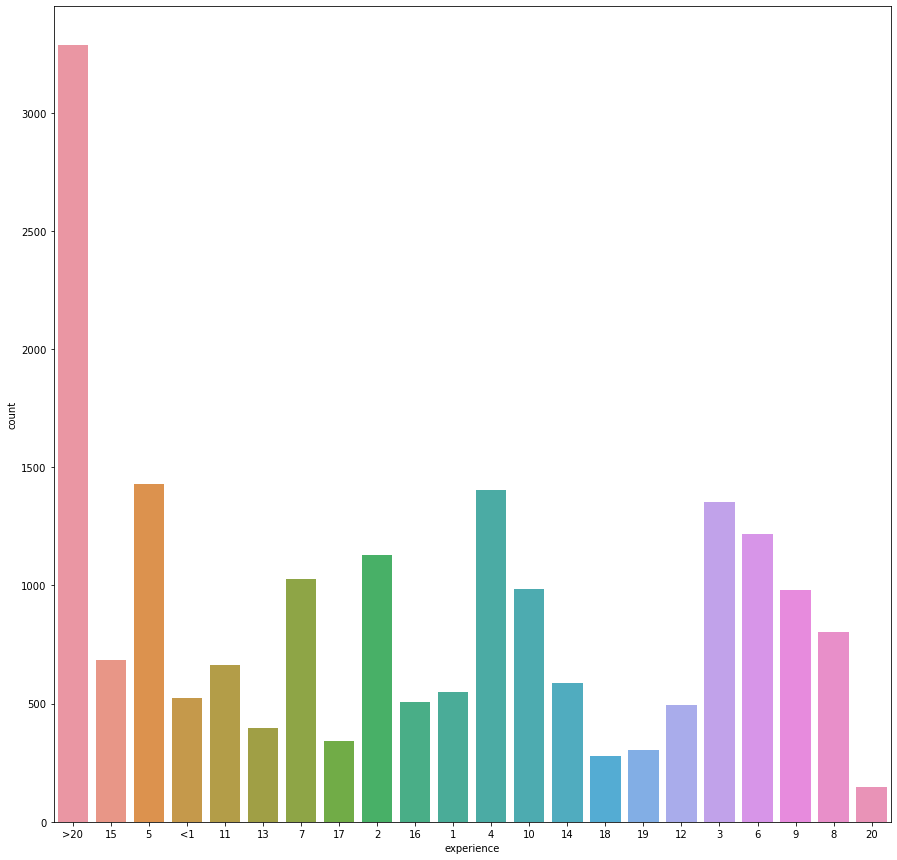

--------------------------------------------------
col :  company_size


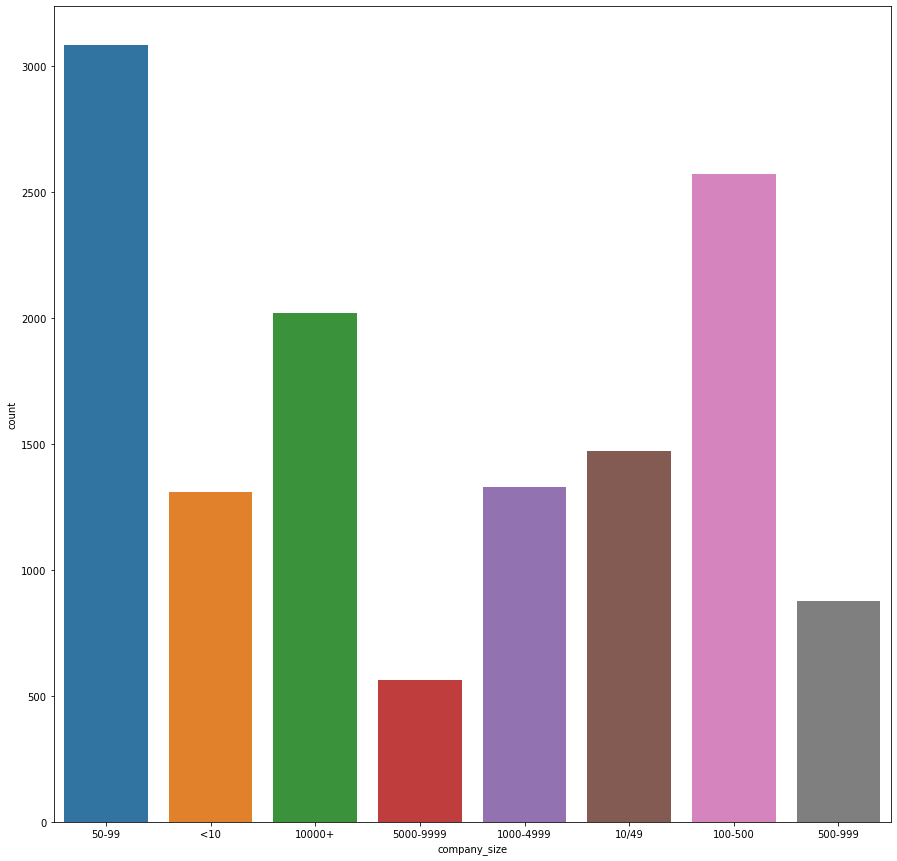

--------------------------------------------------
col :  company_type


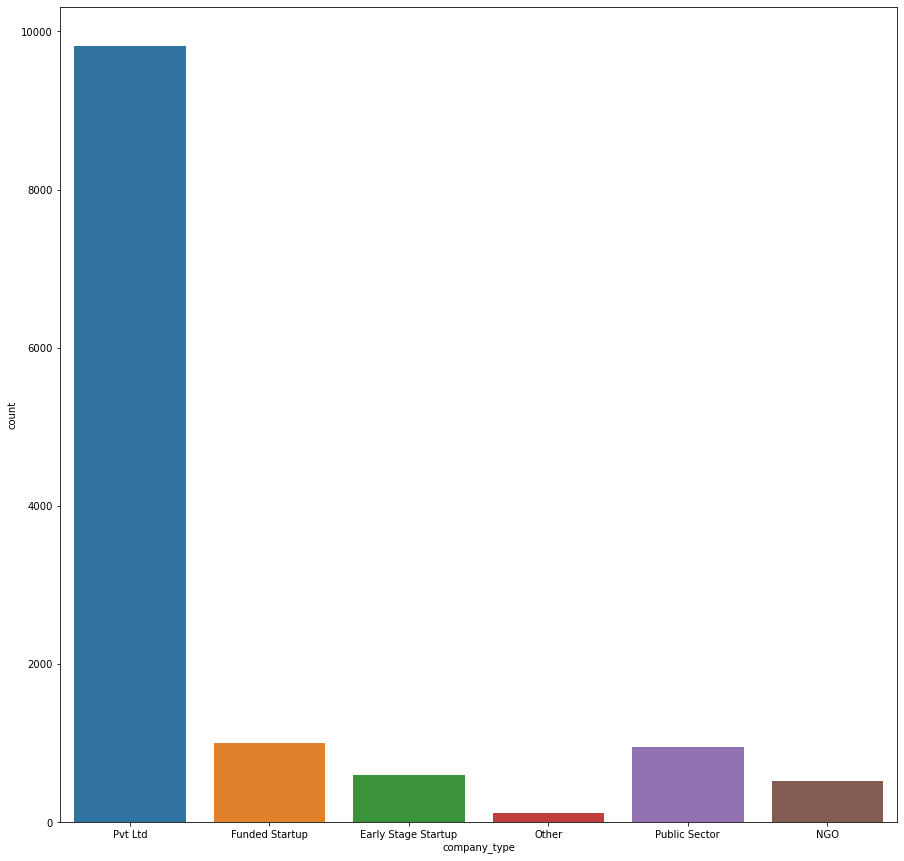

--------------------------------------------------
col :  last_new_job


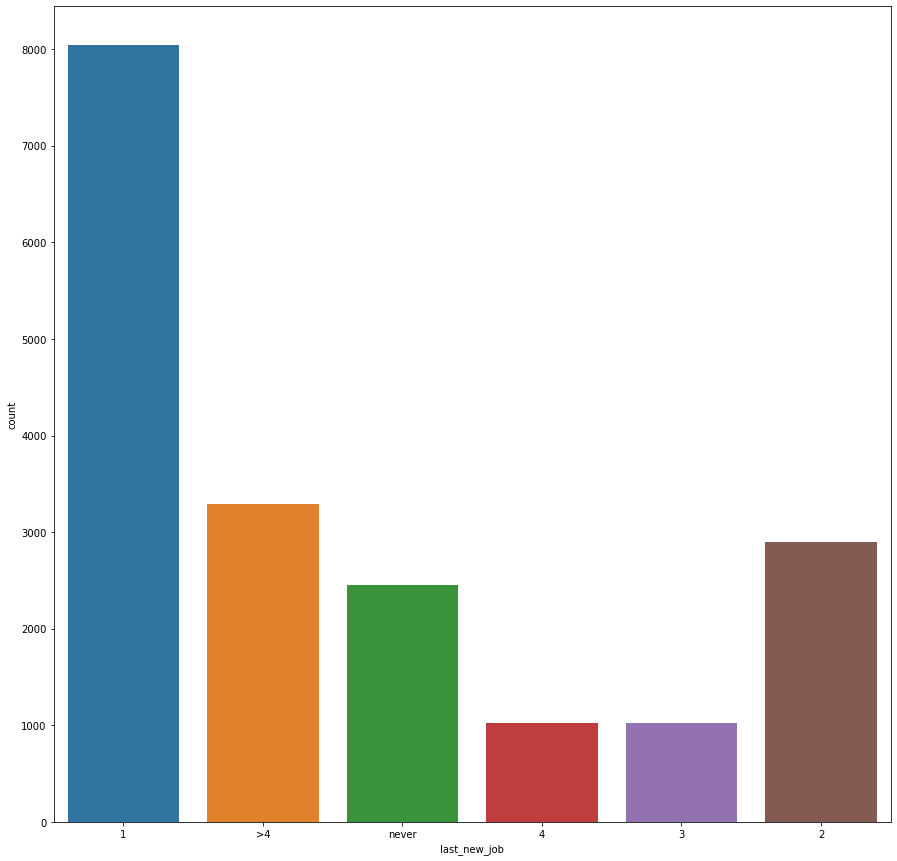

--------------------------------------------------
col :  training_hours


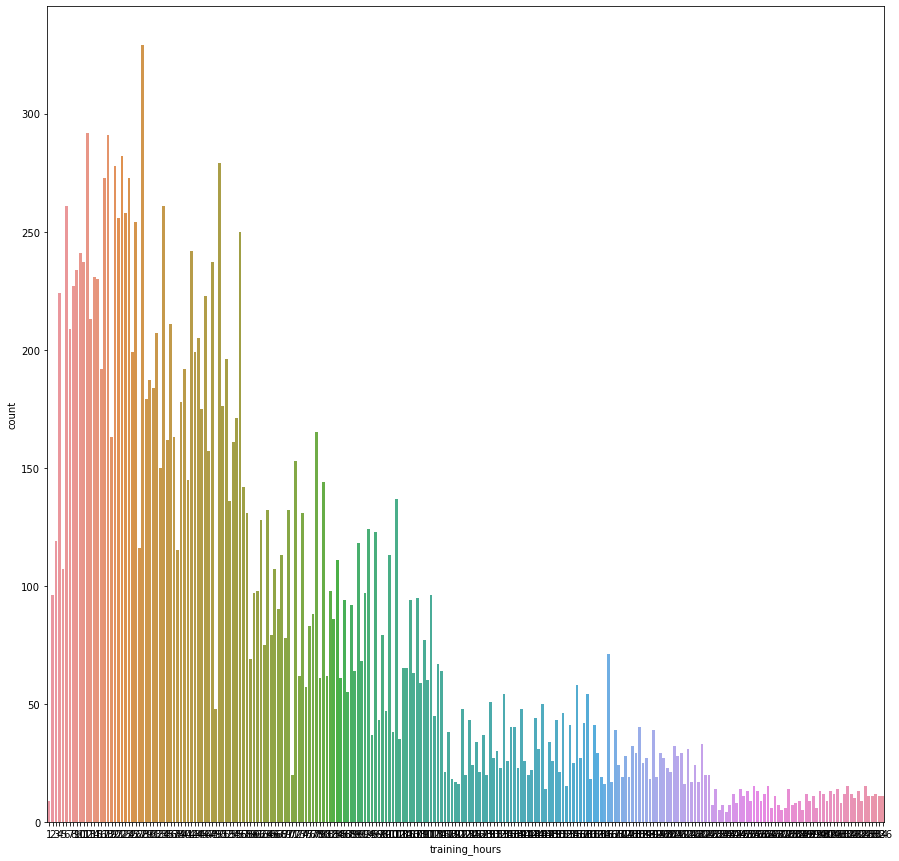

--------------------------------------------------
col :  target


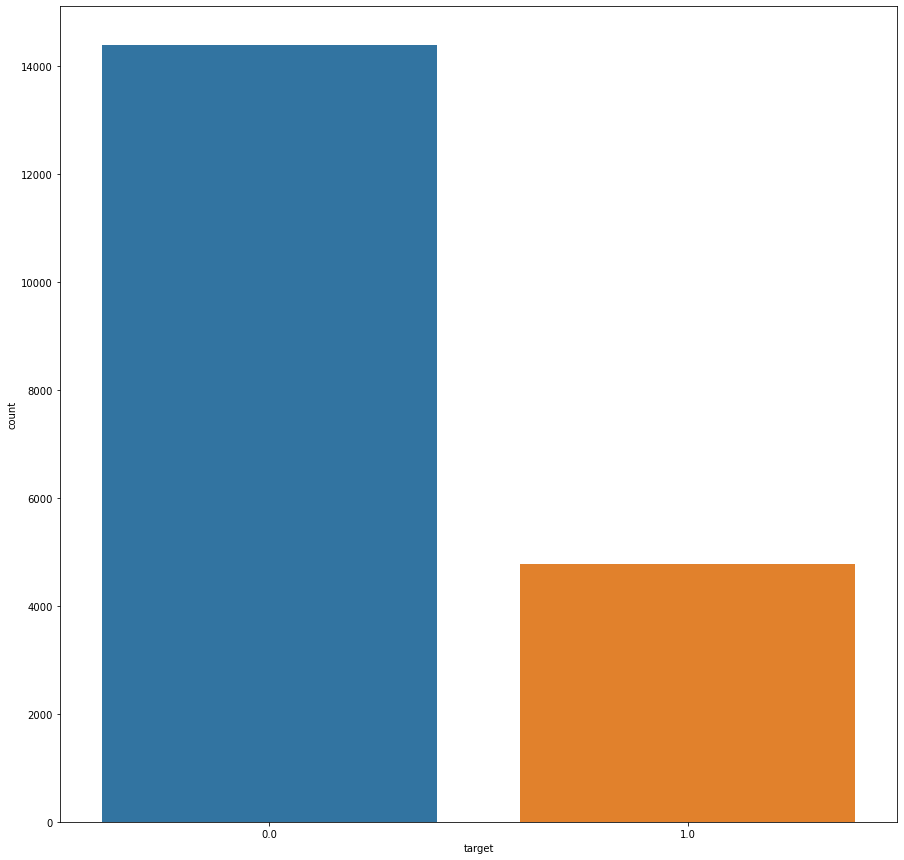

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data.columns :
    
    print('-'*50)
    print('col : ',i)
    plt.figure(figsize=(15,15))
    sns.countplot(x=i, data=data)
    plt.show()

In [5]:
for i in data.columns :
    print('{}.\n'.format(data[i].head(3)))

0     8949
1    29725
2    11561
Name: enrollee_id, dtype: int64.

0    city_103
1     city_40
2     city_21
Name: city, dtype: object.

0    0.920
1    0.776
2    0.624
Name: city_development_index, dtype: float64.

0    Male
1    Male
2     NaN
Name: gender, dtype: object.

0    Has relevent experience
1     No relevent experience
2     No relevent experience
Name: relevent_experience, dtype: object.

0       no_enrollment
1       no_enrollment
2    Full time course
Name: enrolled_university, dtype: object.

0    Graduate
1    Graduate
2    Graduate
Name: education_level, dtype: object.

0    STEM
1    STEM
2    STEM
Name: major_discipline, dtype: object.

0    >20
1     15
2      5
Name: experience, dtype: object.

0      NaN
1    50-99
2      NaN
Name: company_size, dtype: object.

0        NaN
1    Pvt Ltd
2        NaN
Name: company_type, dtype: object.

0        1
1       >4
2    never
Name: last_new_job, dtype: object.

0    36
1    47
2    83
Name: training_hours, dtype: int64.

In [6]:
num_col = [x for x in data.columns
          if data[x].dtype in ['int64','float64']]
data[num_col].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
# New trend code

data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
obj_col = [x for x in data.columns
          if data[x].dtype in['O']]
data[obj_col].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [9]:
# New trend code

data.describe(include='O')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [10]:
import numpy as np

for i in obj_col :
    y = np.unique(data[i].astype(str))
    print('-'*50)
    print('col : {}, n_unique : {}, unique : {}'.format(i, len(y), y))

--------------------------------------------------
col : city, n_unique : 123, unique : ['city_1' 'city_10' 'city_100' 'city_101' 'city_102' 'city_103' 'city_104'
 'city_105' 'city_106' 'city_107' 'city_109' 'city_11' 'city_111'
 'city_114' 'city_115' 'city_116' 'city_117' 'city_118' 'city_12'
 'city_120' 'city_121' 'city_123' 'city_126' 'city_127' 'city_128'
 'city_129' 'city_13' 'city_131' 'city_133' 'city_134' 'city_136'
 'city_138' 'city_139' 'city_14' 'city_140' 'city_141' 'city_142'
 'city_143' 'city_144' 'city_145' 'city_146' 'city_149' 'city_150'
 'city_152' 'city_155' 'city_157' 'city_158' 'city_159' 'city_16'
 'city_160' 'city_162' 'city_165' 'city_166' 'city_167' 'city_171'
 'city_173' 'city_175' 'city_176' 'city_179' 'city_18' 'city_180'
 'city_19' 'city_2' 'city_20' 'city_21' 'city_23' 'city_24' 'city_25'
 'city_26' 'city_27' 'city_28' 'city_30' 'city_31' 'city_33' 'city_36'
 'city_37' 'city_39' 'city_40' 'city_41' 'city_42' 'city_43' 'city_44'
 'city_45' 'city_46' 'city_4

# Clear Missing Value

- Delete
- fill 0,mean, median, min, max, freq

In [11]:
# checking

data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
dropdf = data.copy()
dropdf.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
# First drop Gender : 'NaN' and Null

dropdf['gender'].dropna()

0          Male
1          Male
4          Male
6          Male
7          Male
          ...  
19152    Female
19153      Male
19154      Male
19155      Male
19156      Male
Name: gender, Length: 14650, dtype: object

In [14]:
dropdf = data.copy()

In [15]:
# (19158, 14) > (14650, 14)

dropdf.dropna(subset=['gender'])

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [16]:
dropdf = dropdf.dropna(subset=['gender'])
dropdf.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        213
education_level            259
major_discipline          1978
experience                  16
company_size              4313
company_type              4433
last_new_job                74
training_hours               0
target                       0
dtype: int64

In [17]:
dropdf['enrolled_university'] = dropdf['enrolled_university'].fillna('no_enrollment')
dropdf

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [18]:
dropdf.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level            259
major_discipline          1978
experience                  16
company_size              4313
company_type              4433
last_new_job                74
training_hours               0
target                       0
dtype: int64

In [19]:
dropdf['education_level'] = dropdf['education_level'].fillna('no_education')
dropdf['major_discipline'] = dropdf['major_discipline'].fillna('No Major')
dropdf['experience'] = dropdf['experience'].fillna('<1')
dropdf['company_size'] = dropdf['company_size'].fillna('<10')
dropdf['company_type'] = dropdf['company_type'].fillna('Other')
dropdf['last_new_job'] = dropdf['last_new_job'].fillna('never')
dropdf.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Label Encoding
- sklearn LabelEncoding
- skleanr One-Hot Encoding
- pandas get_dummies
- mapping

In [20]:
import numpy as np

for i in obj_col :
    y = np.unique(dropdf[i].astype(str))
    print('-'*50)
    print('col : {}, n_unique : {}, unique : {}'.format(i, len(y), y))

--------------------------------------------------
col : city, n_unique : 122, unique : ['city_1' 'city_10' 'city_100' 'city_101' 'city_102' 'city_103' 'city_104'
 'city_105' 'city_106' 'city_107' 'city_109' 'city_11' 'city_111'
 'city_114' 'city_115' 'city_116' 'city_117' 'city_118' 'city_12'
 'city_120' 'city_121' 'city_123' 'city_126' 'city_127' 'city_128'
 'city_129' 'city_13' 'city_131' 'city_133' 'city_134' 'city_136'
 'city_138' 'city_139' 'city_14' 'city_140' 'city_141' 'city_142'
 'city_143' 'city_144' 'city_145' 'city_146' 'city_149' 'city_150'
 'city_152' 'city_155' 'city_157' 'city_158' 'city_159' 'city_16'
 'city_160' 'city_162' 'city_165' 'city_166' 'city_167' 'city_173'
 'city_175' 'city_176' 'city_179' 'city_18' 'city_180' 'city_19' 'city_2'
 'city_20' 'city_21' 'city_23' 'city_24' 'city_25' 'city_26' 'city_27'
 'city_28' 'city_30' 'city_31' 'city_33' 'city_36' 'city_37' 'city_39'
 'city_40' 'city_41' 'city_42' 'city_43' 'city_44' 'city_45' 'city_46'
 'city_48' 'city_50

In [21]:
encoding_df = dropdf.copy()
encoding_df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [22]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

for i in obj_col :
        
    le = LabelEncoder()
    result = le.fit_transform(encoding_df[i])
#     result = result.reshape(-1,1)
    print(result)

[ 5 76 50 ...  5  5 93]
[1 1 1 ... 1 1 1]
[0 1 0 ... 0 0 0]
[2 2 2 ... 2 2 2]
[0 0 2 ... 0 0 1]
[5 5 5 ... 5 5 3]
[21  6 21 ...  5 21 20]
[7 4 4 ... 7 4 5]
[3 5 1 ... 3 5 5]
[0 4 3 ... 3 3 1]


In [23]:
enc_classes = {} 
def encoding_label(x):  #x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)

    enc_classes[x.name] = le.classes_   #x.name: 컬럼명

    return label

In [24]:
d1 = encoding_df[obj_col].apply(encoding_label)
d2 = encoding_df[num_col]
new_encoding_df = d1.join(d2)
new_encoding_df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,enrollee_id,city_development_index,training_hours,target
0,5,1,0,2,0,5,21,7,3,0,8949,0.920,36,1.0
1,76,1,1,2,0,5,6,4,5,4,29725,0.776,47,0.0
4,50,1,0,2,2,5,21,4,1,3,666,0.767,8,0.0
6,49,1,0,2,1,3,15,4,1,0,28806,0.920,24,0.0
7,82,1,0,2,0,5,4,7,5,4,402,0.762,18,1.0


# Purpose of this practice is --predict-- person who is suit our company
- 1. Logistic

In [25]:
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = new_encoding_df.loc[:,'city':'training_hours']
y = new_encoding_df['target']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,enrollee_id,city_development_index,training_hours
0,5,1,0,2,0,5,21,7,3,0,8949,0.920,36
1,76,1,1,2,0,5,6,4,5,4,29725,0.776,47
4,50,1,0,2,2,5,21,4,1,3,666,0.767,8
6,49,1,0,2,1,3,15,4,1,0,28806,0.920,24
7,82,1,0,2,0,5,4,7,5,4,402,0.762,18


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     196.2
Date:                Thu, 31 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:07:53   Log-Likelihood:                -6958.7
No. Observations:               14650   AIC:                         1.395e+04
Df Residuals:                   14636   BIC:                         1.405e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\BIS_COM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
result.params

const                     1.183589
city                     -0.000805
gender                   -0.025387
relevent_experience       0.064634
enrolled_university      -0.024048
education_level          -0.026599
major_discipline          0.010909
experience                0.000611
company_size              0.022047
company_type             -0.011765
last_new_job             -0.005902
enrollee_id               0.000001
city_development_index   -1.136169
training_hours           -0.000129
dtype: float64

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve, auc

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test,y_pred)

오차 행렬
[[2753   37]
 [ 841   32]]
정확도: 0.7603, 정밀도: 0.4638, 재현율: 0.0367,    F1: 0.0679, AUC:0.5117


# RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
import mglearn

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7933387933387933


In [31]:
from sklearn.model_selection import KFold, GridSearchCV

rf_param_grid = {
    'n_estimators' : [100,200],
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_leaf' : [3,5,7,10],
    'min_samples_split' : [2,3,5,10]
}

In [32]:
rf_grid = GridSearchCV(forest, param_grid = rf_param_grid, scoring="accuracy",
                      n_jobs = -1, verbose = 1)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.5min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [33]:
print("Best Accuracy : {0:.4f}".format(rf_grid.best_score_))
print("Best Param : ", rf_grid.best_params_)

Best Accuracy : 0.8036
Best Param :  {'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
feature = forest.feature_importances_
type(feature)

ft_importance = pd.Series(feature, index = x_train.columns)
ft_importance = ft_importance.sort_values(ascending=False)

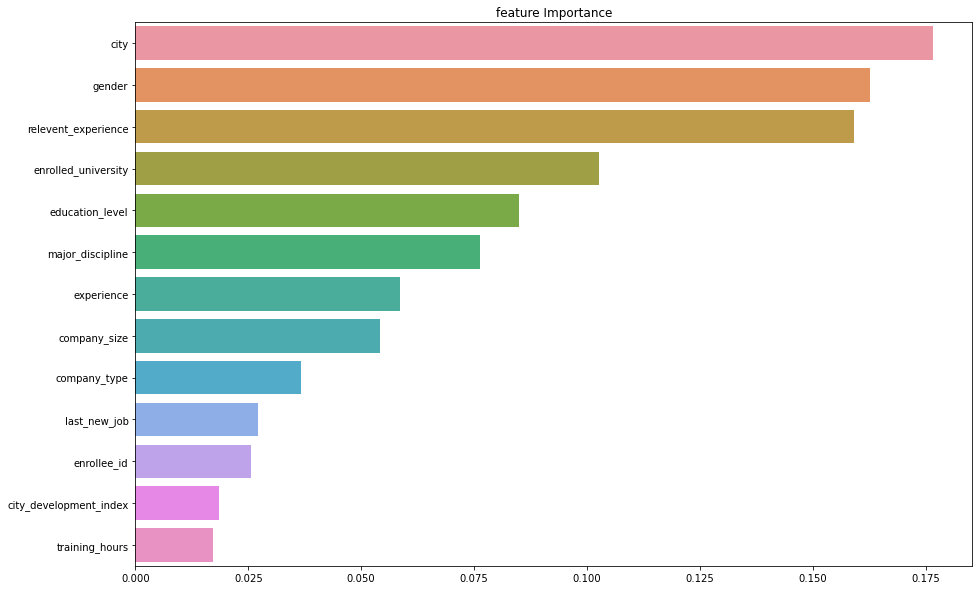

In [35]:
plt.figure(figsize=(15,10))
plt.title("feature Importance")
sns.barplot(x=ft_importance, y=x_train.columns)
plt.show()

# D/L

In [36]:
import tensorflow as tf
from keras import layers, models

batch_size = 64
epochs = 25
print(x_train.shape)
print(y_train.shape)

(10987, 13)
(10987,)


In [37]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=128, activation='linear',input_shape=(13,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 2,050
Trainable params: 2,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

In [39]:
history=model.fit(x_train, y_train, 
          epochs=100, 
          verbose=1, 
          validation_split=0.25)

Epoch 1/100
258/258 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7709 - val_loss: nan - val_accuracy: 0.7688
Epoch 2/100
258/258 [==============================] - 0s 617us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 3/100
258/258 [==============================] - 0s 611us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 4/100
258/258 [==============================] - 0s 580us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 5/100
258/258 [==============================] - 0s 578us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 6/100
258/258 [==============================] - 0s 588us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 7/100
258/258 [==============================] - 0s 588us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 8/100
258/258 [========

258/258 [==============================] - 0s 570us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 60/100
258/258 [==============================] - 0s 577us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 61/100
258/258 [==============================] - 0s 566us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 62/100
258/258 [==============================] - 0s 601us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 63/100
258/258 [==============================] - 0s 580us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 64/100
258/258 [==============================] - 0s 578us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 65/100
258/258 [==============================] - 0s 570us/step - loss: nan - accuracy: 0.7718 - val_loss: nan - val_accuracy: 0.7688
Epoch 66/100
258/258 [===========

In [40]:
model.evaluate(x_test, y_test)

115/115 [==============================] - 0s 321us/step - loss: nan - accuracy: 0.7617


[nan, 0.7616707682609558]

In [41]:
preds = model.predict(x_test, batch_size=128)
preds[0]

array([nan, nan], dtype=float32)

In [42]:
test_df = pd.read_csv(r"C:\Users\BIS_COM\data\train\HR\aug_test.csv")

In [43]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = new_encoding_df.loc[:,'city':'training_hours']
y = test_df['target']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

KeyError: 'target'

In [45]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
